# Hotspots

Hotspots California map: 
- Wildifre-wildifreSmokePM2.5, 
- Heat-wildfire,
- Heat-PM2.5, 
- Wildifre-Heat-SmokePM2.5P

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("outputs/merged_heatday_coldday_wfday_polluted_smoke_polluted_rolling.parquet")

In [ ]:
df = df.drop(columns = ['tmin','tmax','pm25','smoke_pm'])

In [3]:
df.head()

,time,FIPS,tmax,tmin,pm25,wfday,GEOID,smoke_pm,rhum,heatday,coldday,polluted,smoke_pm_non_zero,smoke_pm_gt_five
0,2006-01-01,1765.0,11.149988,8.649988,5.052,False,6.001400e+09,0.0,100.0,False,False,False,False,False
1,2006-01-01,1766.0,13.350000,8.749994,7.100,False,6.001400e+09,0.0,100.0,False,False,False,False,False
2,2006-01-01,1767.0,13.350000,8.749994,7.120,False,6.001400e+09,0.0,100.0,False,False,False,False,False
3,2006-01-01,1768.0,13.350000,8.749994,6.845,False,6.001400e+09,0.0,100.0,False,False,False,False,False
4,2006-01-01,1769.0,13.350000,8.749994,7.100,False,6.001400e+09,0.0,100.0,False,False,False,False,False


### Find hotspots

Terminology:
- h heat
- w wildfire
- p polluted
- s smoke polluted

Example:
- hwp is a hotspot where heat wildfire and pollution are co-occuring 

In [4]:
df.columns

Index(['time', 'FIPS', 'tmax', 'tmin', 'pm25', 'wfday', 'GEOID', 'smoke_pm',
       'rhum', 'heatday', 'coldday', 'polluted', 'smoke_pm_non_zero',
       'smoke_pm_gt_five'],
      dtype='object')

In [6]:
df['hw'] = df['wfday'] & df['heatday']
df['hp'] = df['heatday'] & df['polluted']
df['hwp'] = df['heatday'] & df['wfday'] & df['polluted']

In [7]:
# helper column
df['hwps'] = df[['heatday','wfday','polluted','smoke_pm_non_zero']].sum(axis=1)

In [8]:
# smoke_pm_non_zero taken as main

df['hs'] = df['heatday'] & df['smoke_pm_non_zero']
df['hws'] = df['heatday'] & df['wfday'] & df['smoke_pm_non_zero']
df['ws'] = df['wfday'] & df['smoke_pm_non_zero']

In [9]:
df['hs5'] = df['heatday'] & df['smoke_pm_gt_five']
df['hws5'] = df['heatday'] & df['wfday'] & df['smoke_pm_gt_five']
df['ws5'] = df['wfday'] & df['smoke_pm_gt_five']

In [10]:
df.to_parquet("outputs/hotspots_per_fips_rolling.parquet")

## Hotspot trends over time on Census Tract

In [3]:
df = pd.read_parquet("outputs/hotspots_per_fips_rolling.parquet")

In [6]:
trends_df = (
    df.groupby("FIPS")[
        [
            "time",
            "ws",
            "hw",
            "hp",
            "hs",
            "hwp",
            "hws",
            "hwps",
            "wfday",
            "hs5",
            "hws5",
            "ws5",
            "heatday",
            "coldday",
            "polluted",
            "smoke_pm_non_zero",
            "smoke_pm_gt_five",
        ]
    ]
    .resample("Y", on="time")
    .sum()
)

In [7]:
trends_df.head()

ws  hw  hp  hs  hwp  hws  hwps  wfday  hs5  hws5  ws5  \
FIPS   time                                                                
1765.0 2006-12-31   0   0   0   1    0    0    35      0    0     0    0   
       2007-12-31   0   0   0   0    0    0    25      0    0     0    0   
       2008-12-31   0   0   0   8    0    0    73      0    4     0    0   
       2009-12-31   0   0   0   4    0    0    34      0    2     0    0   
       2010-12-31   0   0   0   2    0    0    29      0    0     0    0   

                   heatday  coldday  polluted  smoke_pm_non_zero  \
FIPS   time                                                        
1765.0 2006-12-31       15       19         0                 20   
       2007-12-31       12       23         0                 13   
       2008-12-31       24       12         2                 47   
       2009-12-31       22       17         0                 12   
       2010-12-31       18       11         0                 11   

                   smoke_pm_gt_five  
FIPS   time                          
1765.0 2006-12-31                 2  
       2007-12-31                 3  
       2008-12-31                23  
       2009-12-31                 4  
       2010-12-31                 0

In [2]:
%load_ext lab_black

In [43]:
import plotting

%load_ext autoreload
%autoreload 2
hs_dict = plotting.get_hotspopt_dict()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
trends_df = trends_df.reset_index()

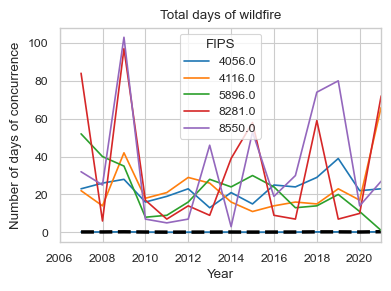

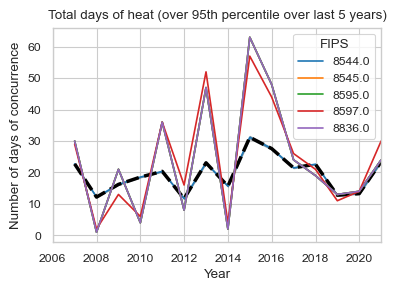

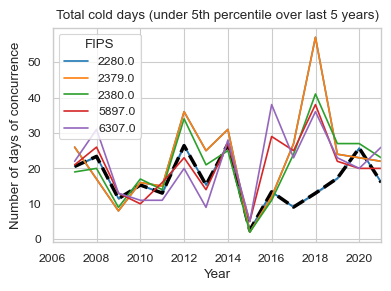

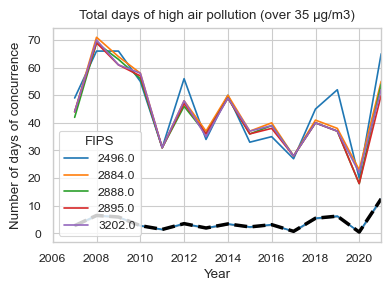

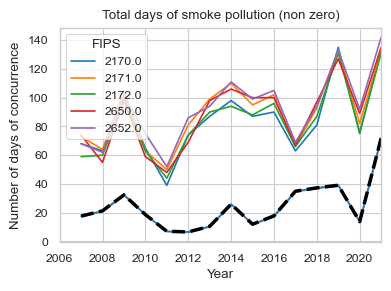

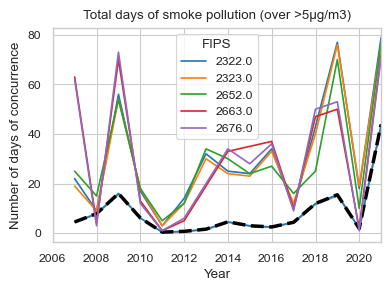

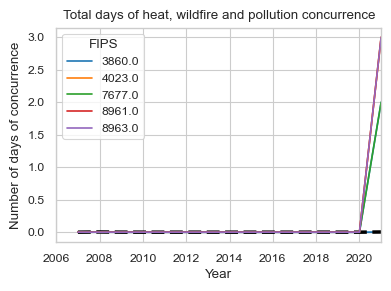

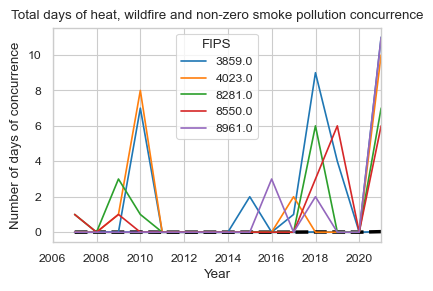

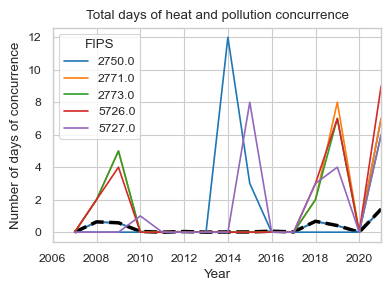

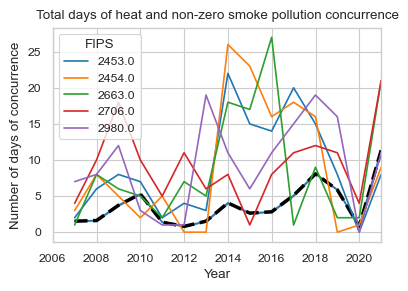

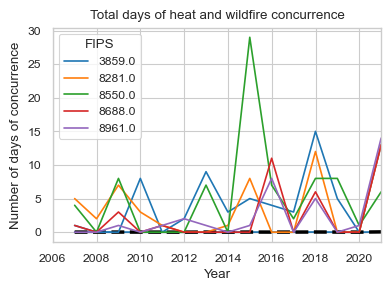

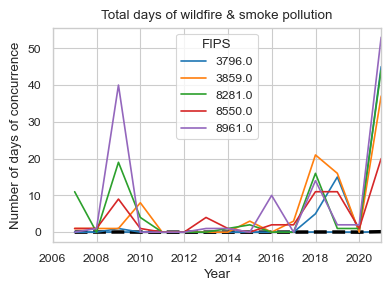

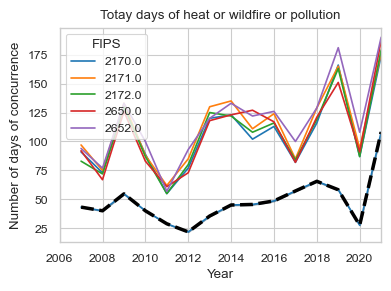

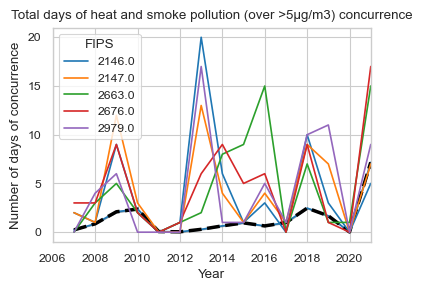

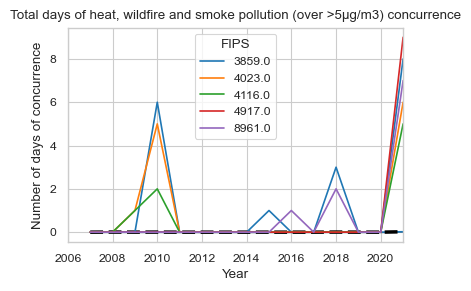

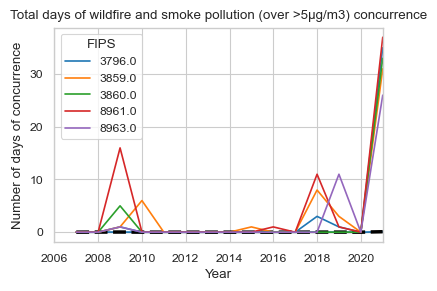

In [45]:
for x in hs_dict.keys():
    l = trends_df.groupby("FIPS")[x].sum().sort_values().tail(5).index

    plotting.trend_plot(trends_df, l, x, hs_dict[x]["title"], hs_dict[x]["title_map"])

In [102]:
len(shapefile[["INTPTLAT", "INTPTLON"]].drop_duplicates())

9129

In [93]:
wf = wf[["FIREDAY_NONE_ZEROS", "FIPS"]].to_dataframe()

<Axes: >

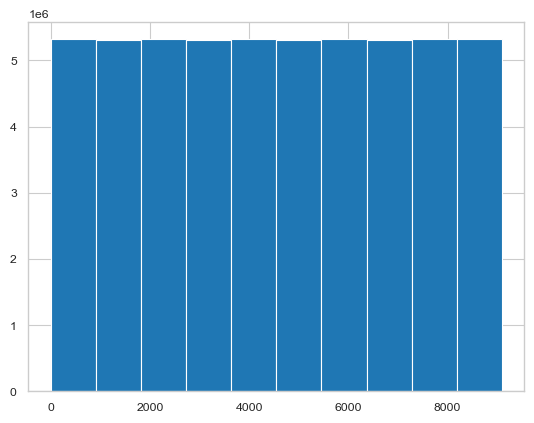

In [95]:
wf["FIPS"].hist()

In [88]:
smoke_crosswalk = pd.read_csv(
    "data/esri/crosswalk_ana/FIPSMapping_gdb_smoke.csv.csv", index_col="FIPS"
)

In [89]:
smoke_crosswalk.head()

,OBJECTID,FIPS.1,Shape__Area,Shape__Length
FIPS,,,,
1763,1,6001400100,1.116406e+07,18039.406468
1764,2,6001400200,9.421795e+05,5066.478058
1765,3,6001400300,1.784293e+06,6738.695851
1766,4,6001400400,1.150529e+06,4818.967484
1767,5,6001400500,9.499916e+05,4170.643497


### Wildfire-Heat-PM25

In [47]:
import geopandas as gpd

In [52]:
df["GEOID"] = df.GEOID.astype(str)

In [55]:
merged_df = df

In [57]:
merged_df = merged_df[
    [
        "GEOID",
        "heatday",
        "coldday",
        "polluted",
        "smoke_pm_non_zero",
        "smoke_pm_gt_five",
        "hw",
        "hp",
        "hwp",
        "hwps",
        "hs",
        "hws",
        "ws",
        "hs5",
        "hws5",
        "ws5",
    ]
]

In [58]:
merged_df = merged_df.groupby("GEOID").sum()

In [48]:
shapefile = gpd.read_file("data/shapefiles/tl_2020_06_tract/tl_2020_06_tract.shp")

In [73]:
shapefile["GEOID"] = shapefile["GEOID"].astype(float)

In [67]:
merged_df = merged_df.reset_index()

In [72]:
merged_df["GEOID"] = merged_df["GEOID"].astype(float)

In [76]:
len(shapefile)

9129

In [84]:
temp = shapefile.merge(merged_df, on="GEOID")

len(temp)

import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
temp.plot(column="hp", ax=ax, legend=True, linewidth=0, cmap="viridis_r")

plt.show()

In [ ]:
for x in hs_dict.keys():
    plotting.draw_map(
        merged_df, 
        counties, 
        x,
        hs_dict[x]["title_map"]
    )

## Add Vunerability Index

In [ ]:
cols = ["STCNTY","FIPS","E_AFAM","EP_AFAM","E_TOTPOP","RPL_THEMES"]
vind = pd.read_csv("data/California.csv", usecols=cols, dtype={"FIPS":str})
vind = vind[vind["RPL_THEMES"] > -1]

In [ ]:
vind.head()

In [ ]:
import geopandas as gpd

In [ ]:
census_tracts = gpd.read_file('data/shapefiles/tl_2020_06_tract/tl_2020_06_tract.shp',
                      dtype = {"GEOID":int})

In [ ]:
df = census_tracts.merge(vind, left_on='GEOID', right_on='FIPS')

In [ ]:
for a in df.columns:
    print(a)

In [ ]:
varsdict= {
"EP_POV150":"Persons below 150% poverty estimate (%)",
"EP_UNEMP":"Civilian (16+) unemployed estimate (%)",
"EP_AGE65":"Persons aged 65 or older (%)",
"EP_AFAM":"Black African-American",
}
pallete= {
"EP_POV150":"pink_r",
"EP_UNEMP":"summer_r",
"EP_AGE65":"winter_r",
"EP_AFAM":"cool",
} # 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool','Wistia'

In [ ]:
for var in varsdict.keys():
    # Plot the map with a specified column and color palette
    ax = df.plot(column=var, cmap=pallete[var], figsize=(5, 5), linewidth=0.1, edgecolor='black')

    # Add a color bar to the plot
    sm = plt.cm.ScalarMappable(cmap=pallete[var], norm=plt.Normalize(vmin=df[var].min(), vmax=df[var].max()))
    sm.var = []
    cbar = plt.colorbar(sm)
    plt.title(varsdict[var])
    plt.tight_layout()
    plt.savefig(varsdict[var])
    plt.show()

In [ ]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame with custom border line size
df.plot(ax=ax, linewidth=0.5, edgecolor='black')

# Set the title, x-axis, and y-axis labels
ax.set_title('Census tract map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
vind.columns

In [ ]:
#vind_grouped = vind.groupby("STCNTY")["RPL_THEMES"].mean() #apply(pd.Series.mode)

In [ ]:
vind["STCNTY_TOTALPOP"] = vind.groupby('STCNTY')["E_TOTPOP"].transform(lambda x: np.sum(x))
vind['WEIGHT'] = vind['E_TOTPOP']/vind['STCNTY_TOTALPOP']

In [ ]:
def weighted_mean(df):
    temp = df['RPL_THEMES'].mul(df['WEIGHT']).sum()
    return temp

In [ ]:
vind_grouped = vind.groupby("STCNTY").apply(weighted_mean)

In [ ]:
vind_grouped=vind_grouped.reset_index()

In [ ]:
hotspotvind = pd.merge(merged_df, vind_grouped, left_on="COUNTY_CODE", right_on="STCNTY", how="outer")

In [ ]:
hotspotvind.to_csv("hotspot_vind_county.csv")

In [ ]:
hotspotvind = hotspotvind.rename(columns={
    0: 'svi'})

In [ ]:
hotspotvind.head()

In [ ]:
plotting.draw_map(
    hotspotvind,
    counties, 
    'svi',
    "Vunerability index")

### Window of 7 days

Hotspot is if all three events happened within 7 days

In [ ]:
df = pd.read_parquet("outputs/merged_heatday_coldday_wfday_polluted_smoke_polluted.parquet")

In [ ]:
df = df.drop(columns = ['tmin','tmax','pm25','smokePM_pred'])

In [ ]:
df = df.reset_index()

In [ ]:
df.set_index('time', inplace=True)

In [ ]:
df.head()

In [ ]:
# create a new column that indicates if all three variables are True in the last 7 days
df['all_true_last_7_days'] = df[["wfday","heatday","smoke_polluted"]].rolling(
    window='7D', min_periods=1).max().sum(axis=1).apply(lambda x: True if x == 3.0 else False)

In [ ]:
df.head()

In [ ]:
df["all_true_last_7_days"].sum()